In [1]:
#Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the customer_value_analysis.csv into the variable customer_df.
df = pd.read_csv(r'C:\Users\Megha\Desktop\Ironhack\Week_4\Day_1\Morning\lab-cleaning-numerical-data\files_for_lab\customer_value_analysis.csv')


First look at its main features (head, shape, info).

In [3]:
# main features (head, shape, info).
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# shape
df.shape

(9134, 24)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [6]:
#Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
df_new_column_names = []
for col in df.columns:
    df_new_column_names.append(col.lower())
df.columns = df_new_column_names

df.head()
# replacing White spaces in column names by _
df.columns = df.columns.str.replace(" ","_")
df.head()
#other changes in data frame and st could be replaced for state
#df = df.rename(columns={'customer':'id',
                            #   'st':'state'}) 
display(df.head())
df.info()                      

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

Change the type of effective_to_date column to DateTime format.

In [7]:

# Convert 'effective_to_date' column to DateTime format
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

# Now, the 'effective_to_date' column is in DateTime format
display(df.head())
df.info()   

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

Check NaN values per column.

In [8]:
#Check NaN values per column.\
for col in df.columns:
    null_values_count= df[col].isnull().sum()
    print("The nul values count for", col , "is", null_values_count)

The nul values count for customer is 0
The nul values count for state is 0
The nul values count for customer_lifetime_value is 0
The nul values count for response is 0
The nul values count for coverage is 0
The nul values count for education is 0
The nul values count for effective_to_date is 0
The nul values count for employmentstatus is 0
The nul values count for gender is 0
The nul values count for income is 0
The nul values count for location_code is 0
The nul values count for marital_status is 0
The nul values count for monthly_premium_auto is 0
The nul values count for months_since_last_claim is 0
The nul values count for months_since_policy_inception is 0
The nul values count for number_of_open_complaints is 0
The nul values count for number_of_policies is 0
The nul values count for policy_type is 0
The nul values count for policy is 0
The nul values count for renew_offer_type is 0
The nul values count for sales_channel is 0
The nul values count for total_claim_amount is 0
The nu

Define a function that given an input dataframe, returns two dataframes: one with numerical columns and 
another with categorical columns of the input dataframe.

In [9]:
#Define a function that given an input dataframe, returns two dataframes: one with numerical columns and 
#another with categorical columns of the input dataframe.

def distint_dataframes_cat_num(df:pd.DataFrame):
    '''this function returns two dataframes: one with numerical columns and 
          another with categorical columns for the input datafram
         input :
         dataframe
         output: 
         two dataframes
         '''
    df_num =  df.select_dtypes(include = ["number"])
    df_cat = df.select_dtypes(include= ["object"])
    print("The dataframe with numerical columns is :")
    display(df_num.head())
    print("The dataframe with categorical columns is :")
    display(df_cat.head())
    return df_cat,df_num

In [10]:
distint_dataframes_cat_num(df)

The dataframe with numerical columns is :


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


The dataframe with categorical columns is :


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(     customer       state response  coverage education employmentstatus  \
 0     BU79786  Washington       No     Basic  Bachelor         Employed   
 1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
 2     AI49188      Nevada       No   Premium  Bachelor         Employed   
 3     WW63253  California       No     Basic  Bachelor       Unemployed   
 4     HB64268  Washington       No     Basic  Bachelor         Employed   
 ...       ...         ...      ...       ...       ...              ...   
 9129  LA72316  California       No     Basic  Bachelor         Employed   
 9130  PK87824  California      Yes  Extended   College         Employed   
 9131  TD14365  California       No  Extended  Bachelor       Unemployed   
 9132  UP19263  California       No  Extended   College         Employed   
 9133  Y167826  California       No  Extended   College       Unemployed   
 
      gender location_code marital_status     policy_type        policy  \
 0         

#Drop any ID column.

In [11]:
#Drop any ID column.
df.info()
df = df.drop("customer",axis=1)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


selecting numerical columns


In [12]:
#selecting numerical columns
df_num =  df.select_dtypes(include = ["number"])
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Get the correlation matrix for the numerical variables. What is the pair of numerical variables 
that have the highest correlation? It makes sense, why?

<Axes: >

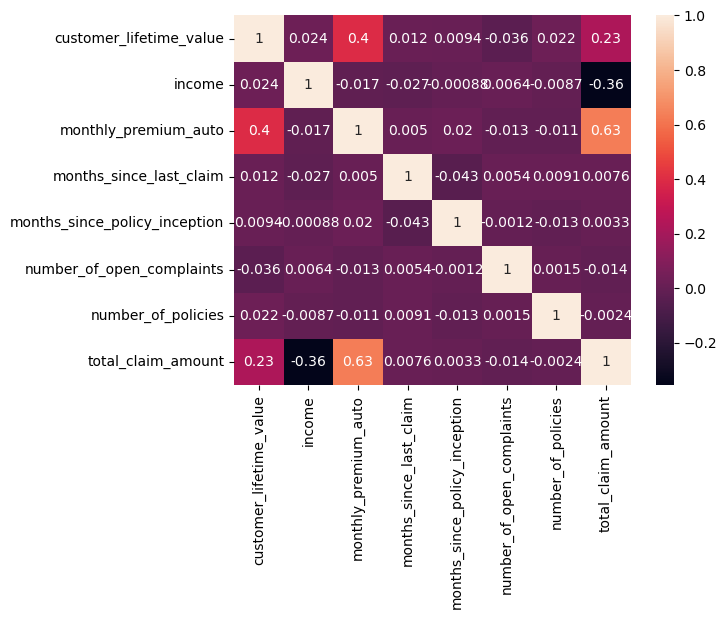

In [13]:
#Get the correlation matrix for the numerical variables. What is the pair of numerical variables 
#that have the highest correlation? It makes sense, why?
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True)

In [14]:
# Find the pair of numerical variables with the highest correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
highest_correlation_pair = max_corr.index[1]

print("Pair of numerical variables with the highest correlation:", highest_correlation_pair)

Pair of numerical variables with the highest correlation: ('monthly_premium_auto', 'total_claim_amount')


Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [15]:
# function to create two data frmes from given numerical dataframe as discrete and continuous
def separate_continuous_discrete(df, threshold=36):
    '''this function returns two dataframes: one with numerical discrete columns and 
          another with numerical continuous columns for the input datafram
         input :
         dataframe
         output: 
         two dataframes
         '''
    continuous_df = df.select_dtypes(include=[np.number])  # Select all numerical columns

    # Initialize an empty list to store names of discrete columns
    discrete_columns = []

    for column in df.columns:
        if df[column].nunique() <= threshold:
            discrete_columns.append(column)

    discrete_df = df[discrete_columns]

    display(continuous_df.head())
    display(discrete_df.head())

    return continuous_df,discrete_df

In [16]:
continuous_df,discrete_df=separate_continuous_discrete(df_num)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).


In [17]:
def create_barplots_discrete(df:pd.DataFrame):
    '''this function returns barplot for all the columns of the discrete_df using seaborn
    
    '''
    plt.figure(figsize=(16,16))
    discrete_cols = df.columns
    for i, col in enumerate(discrete_cols, 1):
        plt.subplot(len(df.columns), 2, i)
        sns.countplot(data=df, x=col, palette='Set3')
        plt.title(f"Bar plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
     # Adjust layout
        plt.tight_layout()

    # Show the plot
        plt.show()    

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


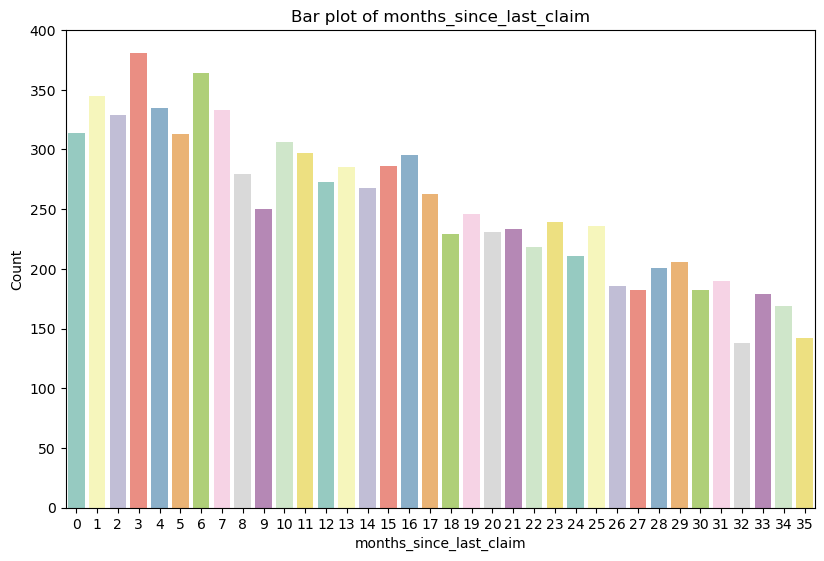

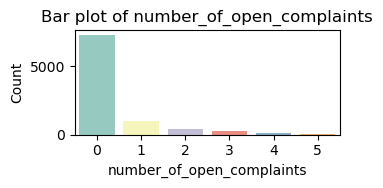

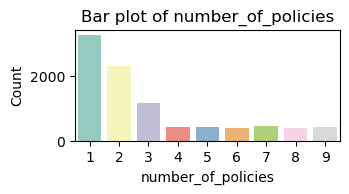

In [18]:
continuous_df,discrete_df=separate_continuous_discrete(df_num)
create_barplots_discrete(discrete_df)

Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [19]:
def create_histplots_continuos(df:pd.DataFrame):
    '''this function returns histograms for all the columns of the discrete_df using seaborn
    
    '''
    plt.figure(figsize=(16,16))
    continuous_col = df.columns
    for col in continuous_col:
        sns.histplot(data=df, x=col ,kde=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
     # Adjust layout
        plt.tight_layout()
      # Show the plot
        plt.show()    

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


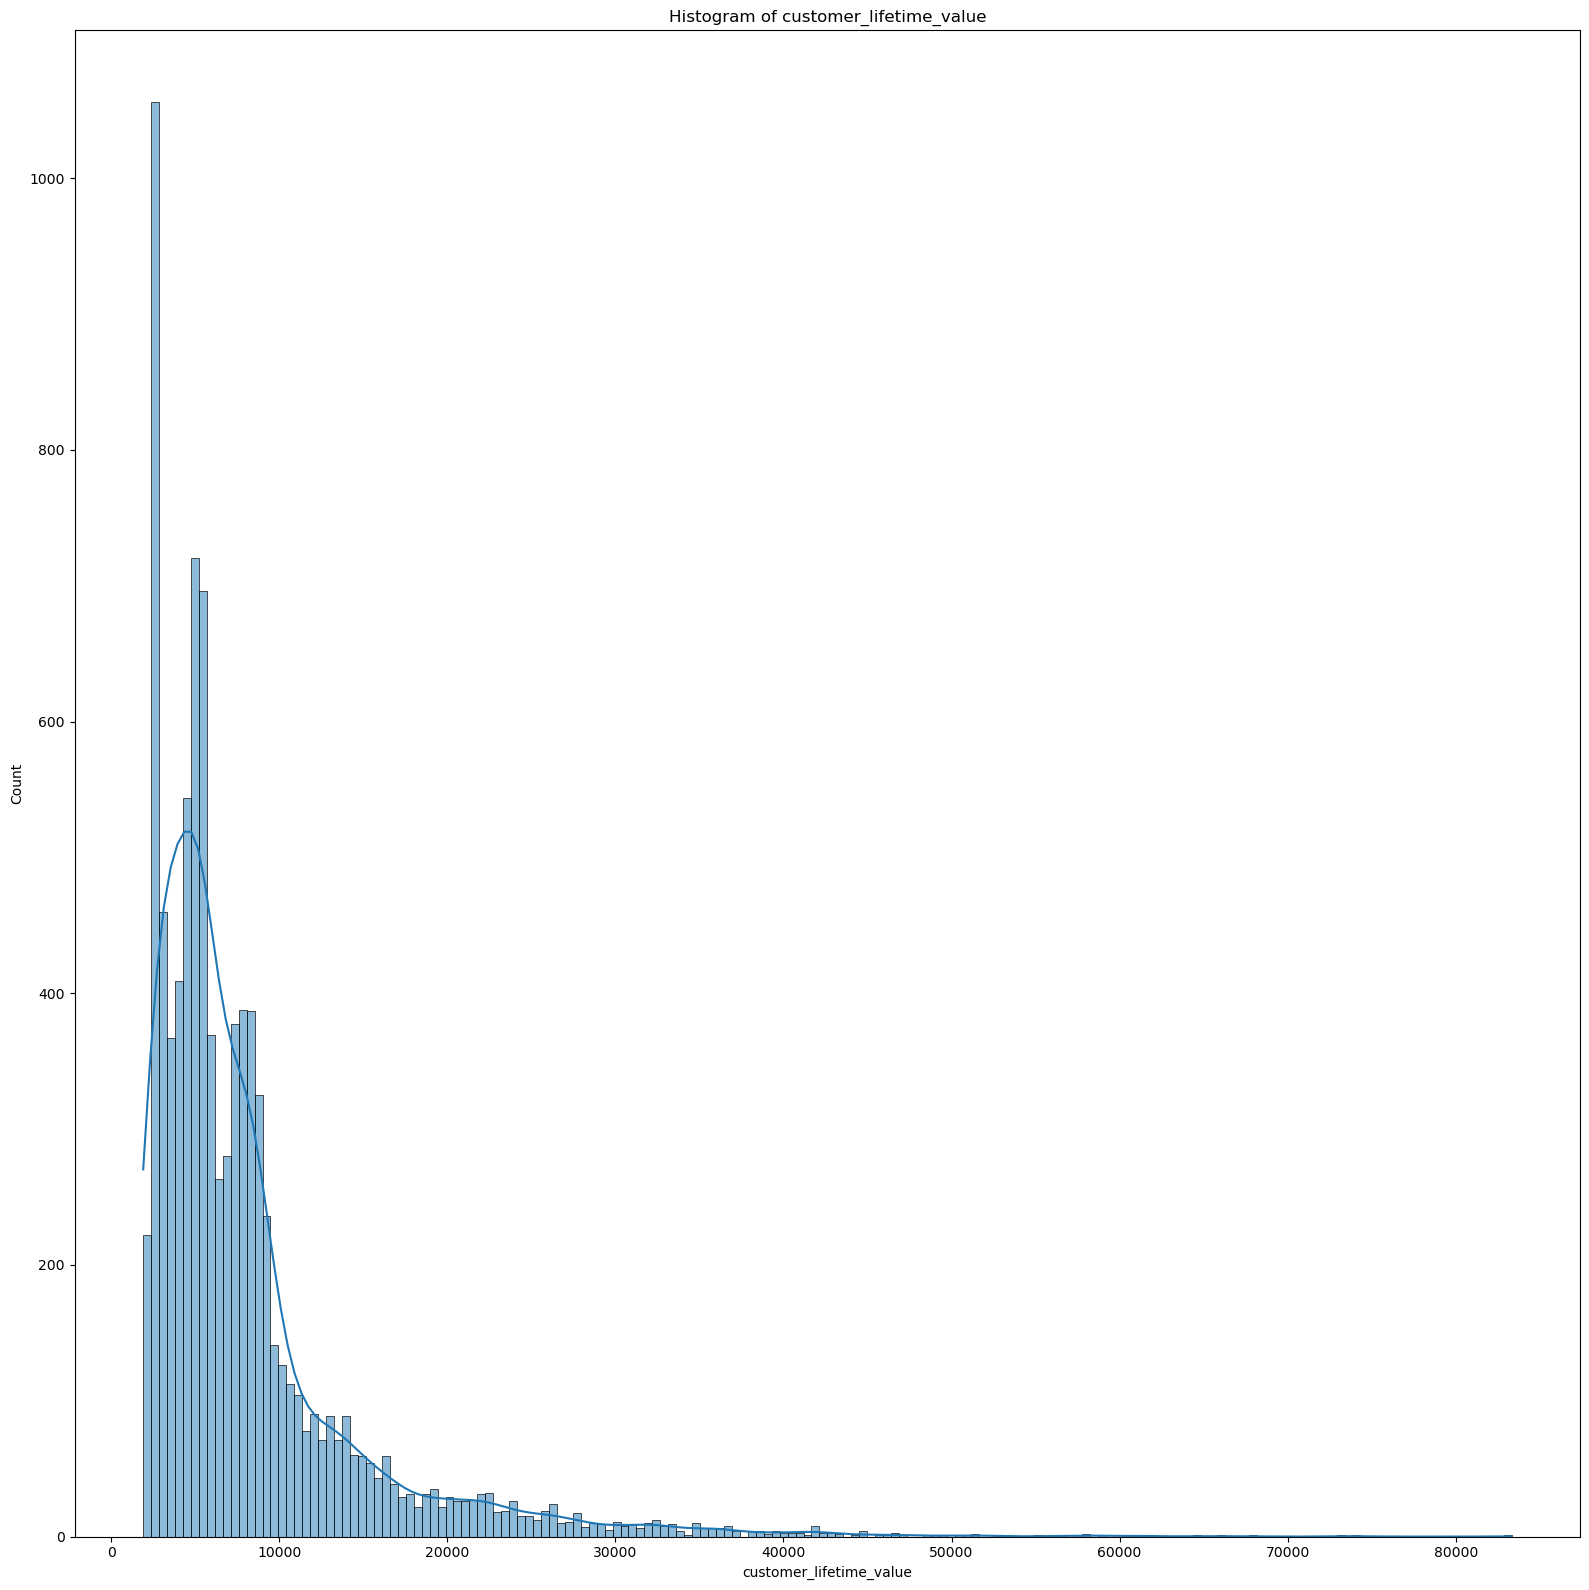

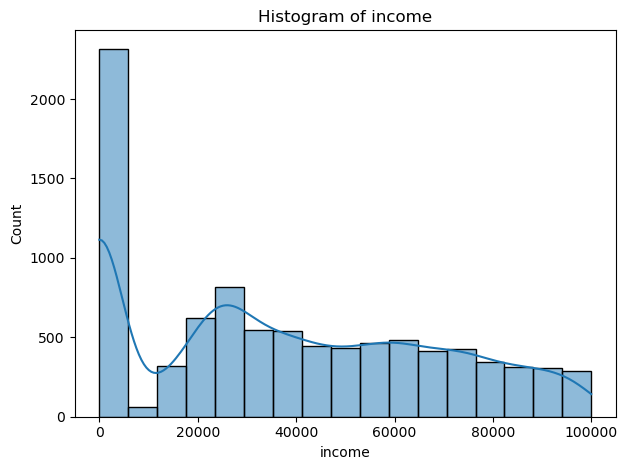

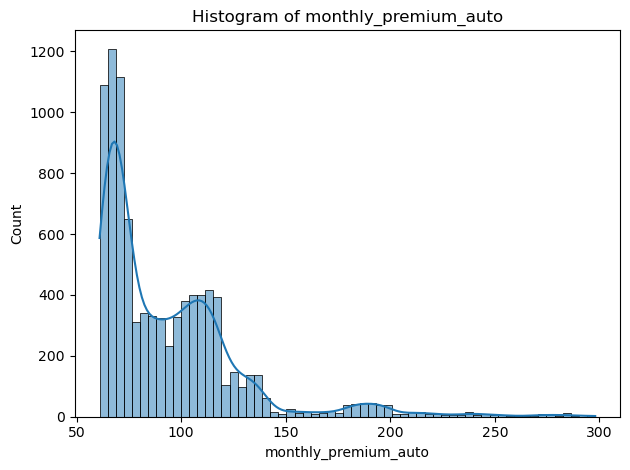

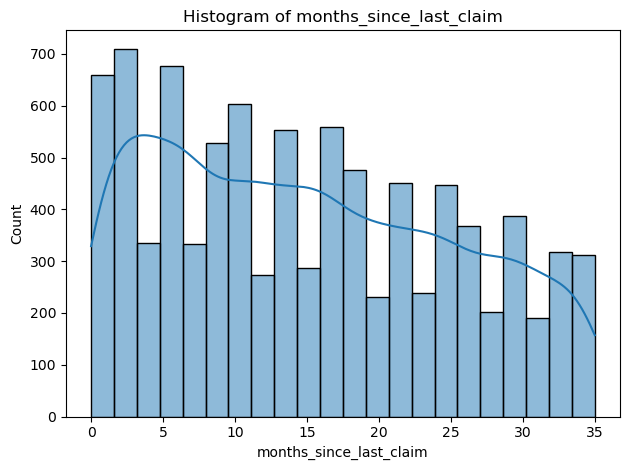

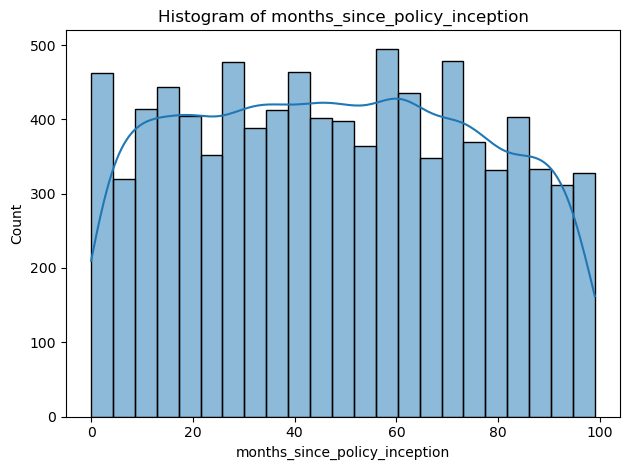

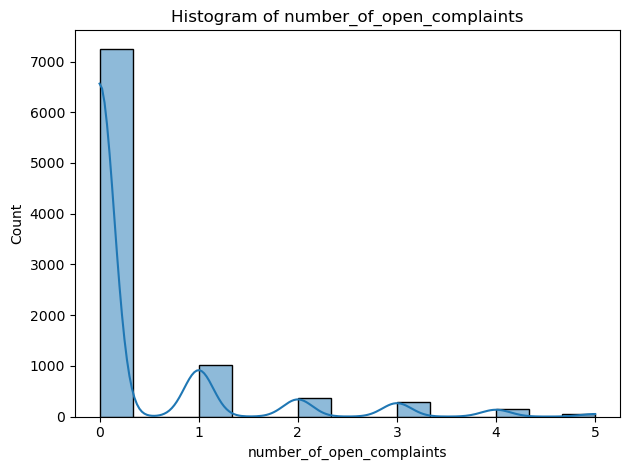

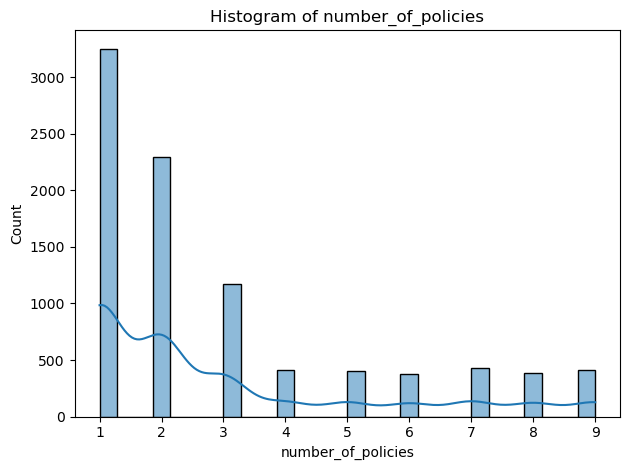

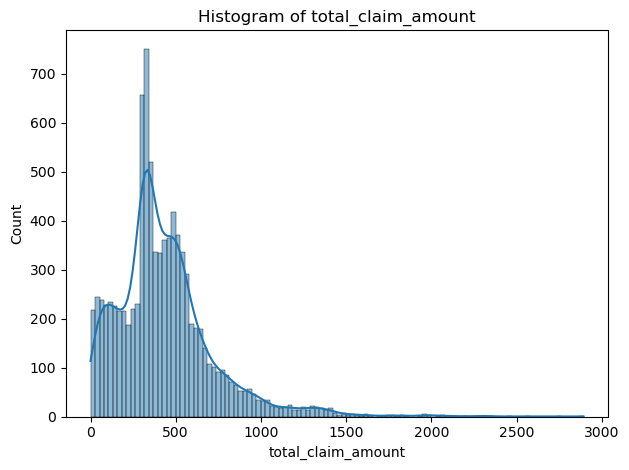

In [20]:
continuous_df,discrete_df=separate_continuous_discrete(df_num)
create_histplots_continuos(continuous_df)

According to the previous histogram plots, do you think that you will have to apply any transformation?


yes because the graphs show skewness, so they need to be transformed.

Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [21]:
def create_boxplots_continuos(df:pd.DataFrame):
    '''this function returns boxplot for all the columns of the discrete_df using seaborn
    
    '''
    plt.figure(figsize=(6,6))
    continuous_col = df.columns
    for col in continuous_col:
        sns.boxplot(data=df, x=col)
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        
     # Adjust layout
        plt.tight_layout()
      # Show the plot
        plt.show()    

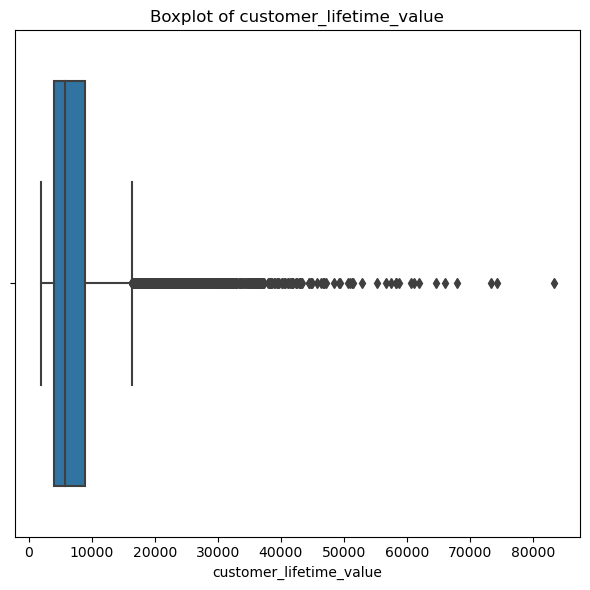

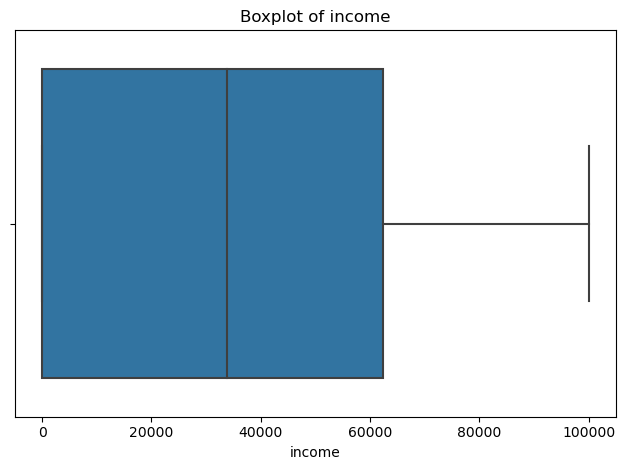

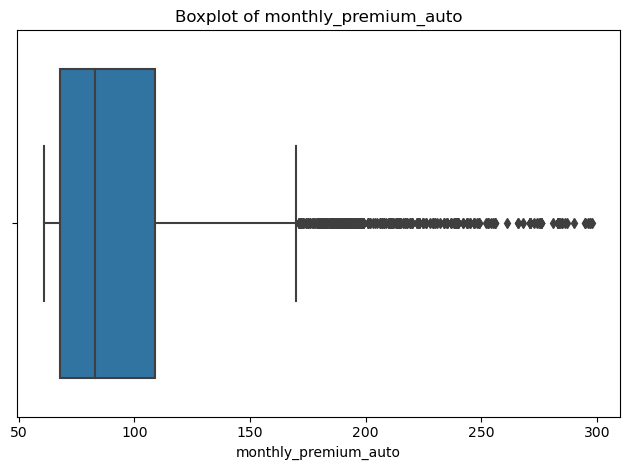

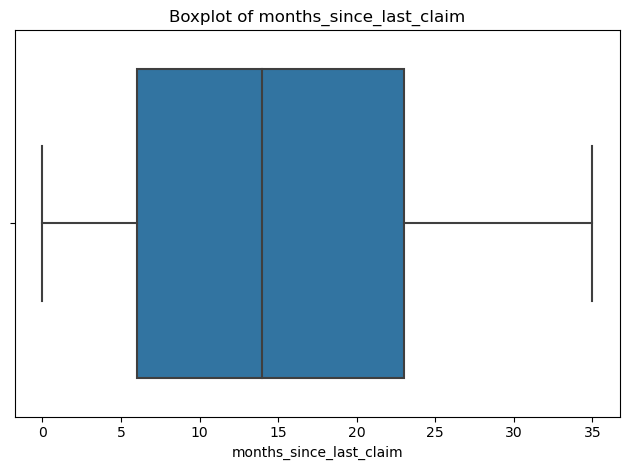

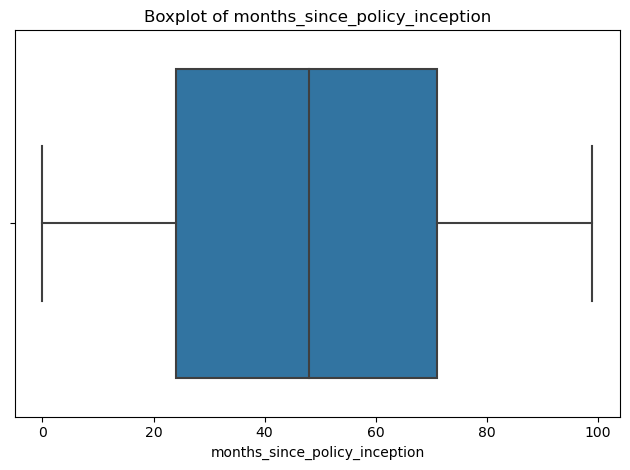

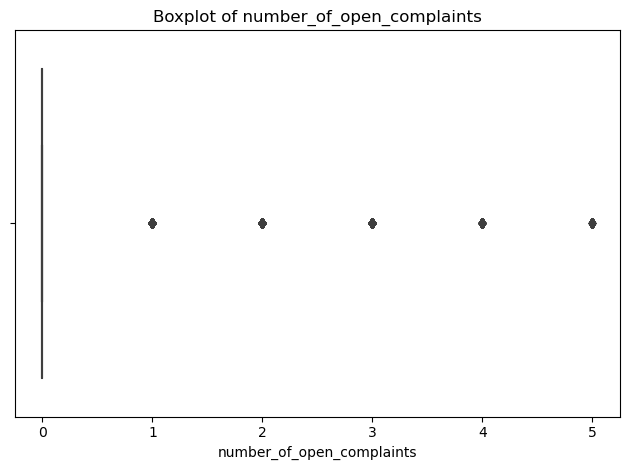

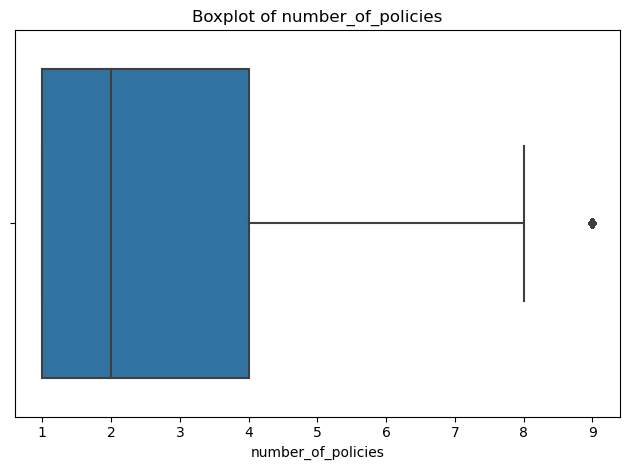

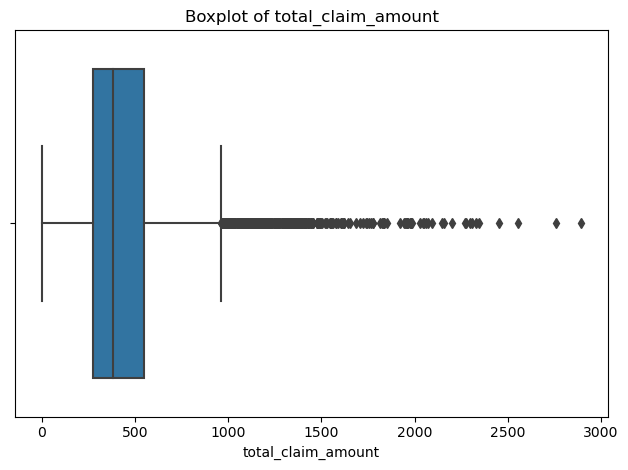

In [22]:
create_boxplots_continuos(continuous_df)

# Lab | Cleaning categorical data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

In [23]:
#selecting categorical columns
df_cat =  df.select_dtypes(include = ["object"])
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
#function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. 
def create_countplots_categorical(df:pd.DataFrame):
    '''this function returns countplots for all the categorical columns seaborn
    
    '''
    plt.figure(figsize=(6,6))
    continuous_col = df.columns
    for col in continuous_col:
        sns.countplot(data=df_cat, y=col, order= df_cat[col].value_counts(dropna=False).index)
        plt.title(f"Countplot of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
     # Adjust layout
        plt.tight_layout()
      # Show the plot
        plt.show()    

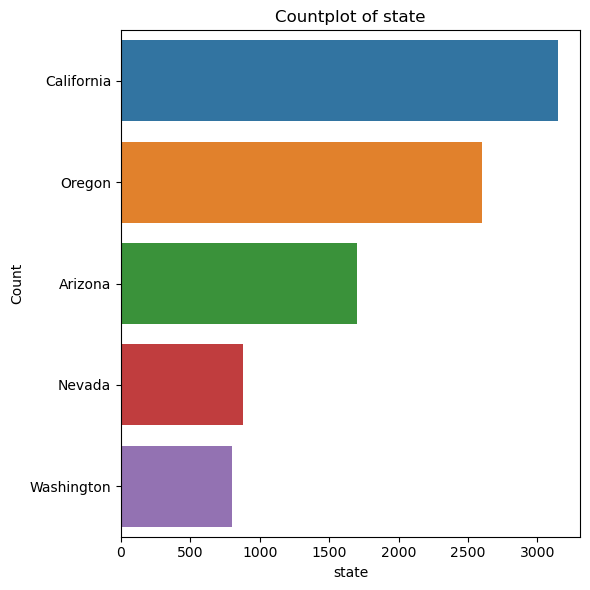

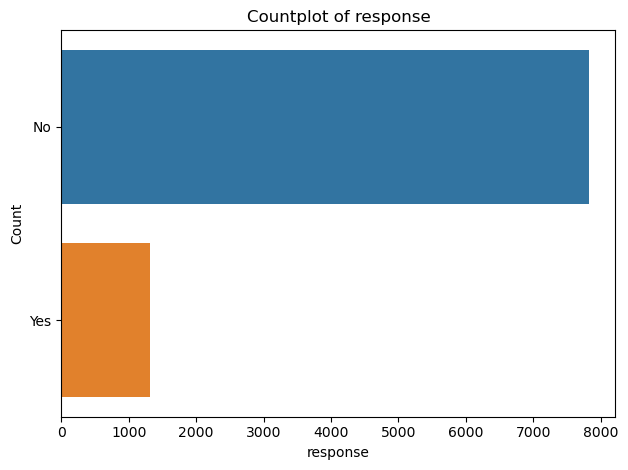

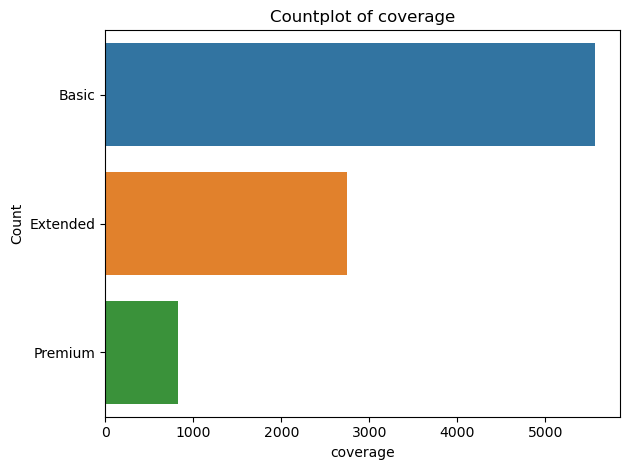

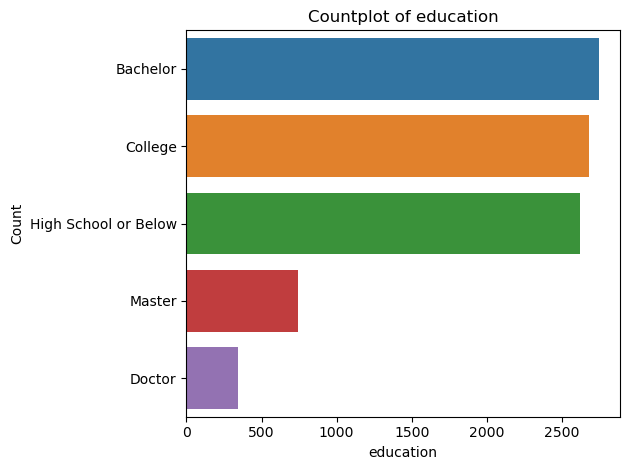

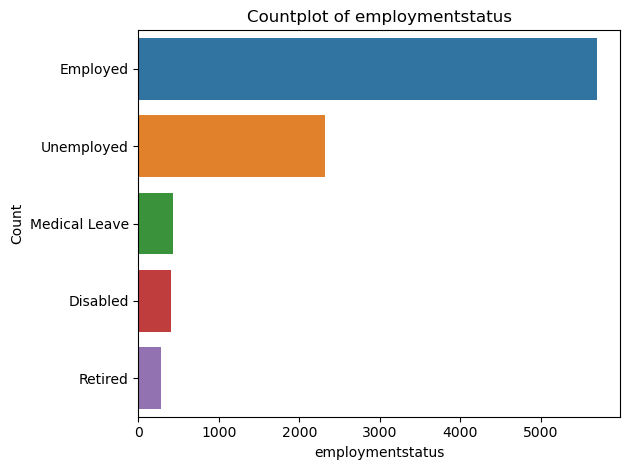

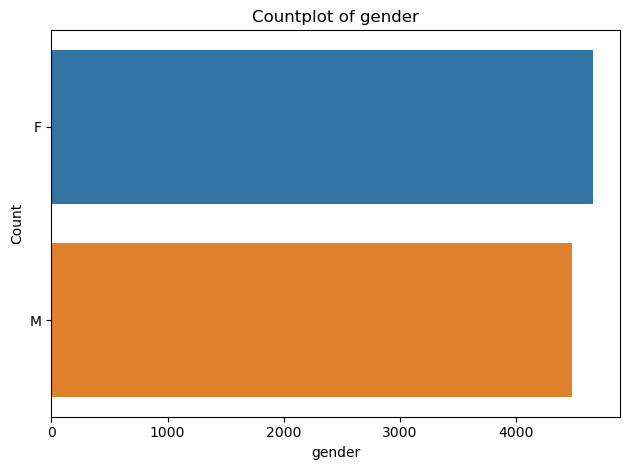

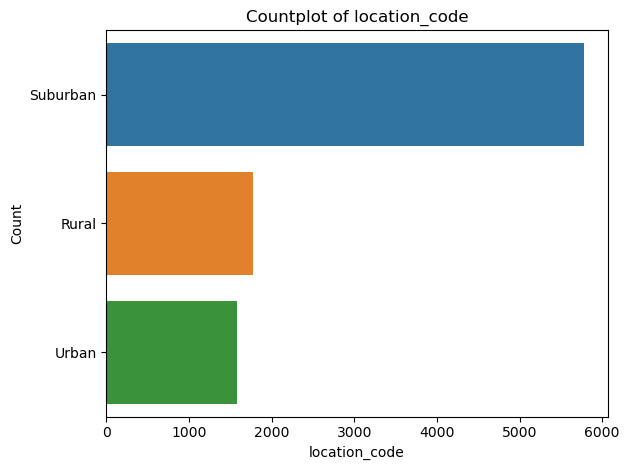

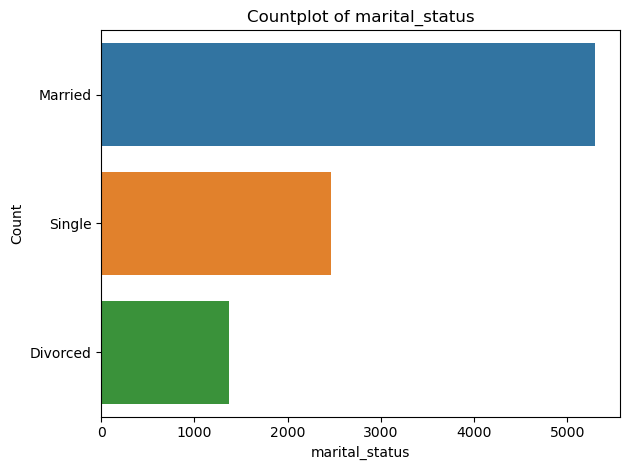

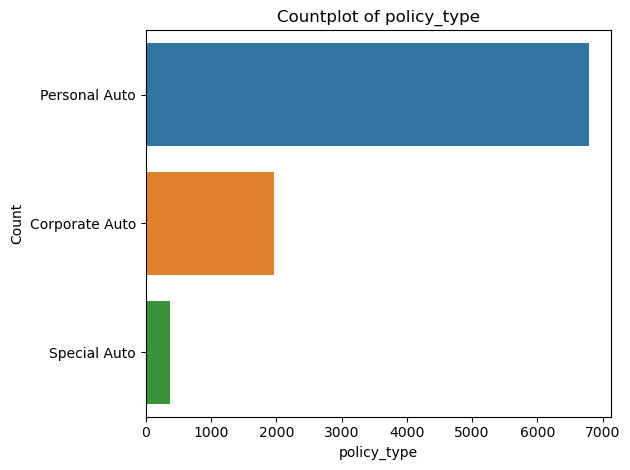

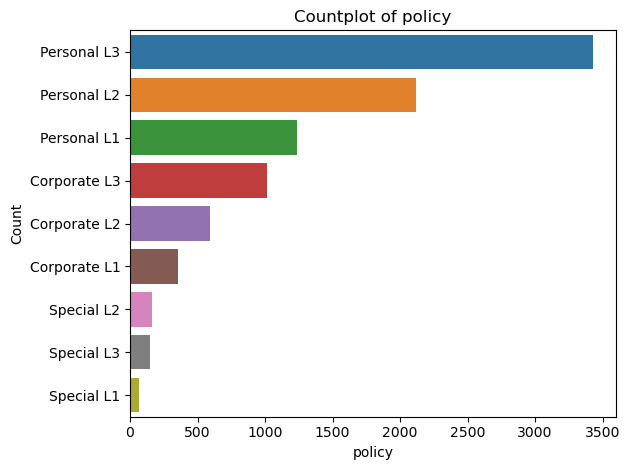

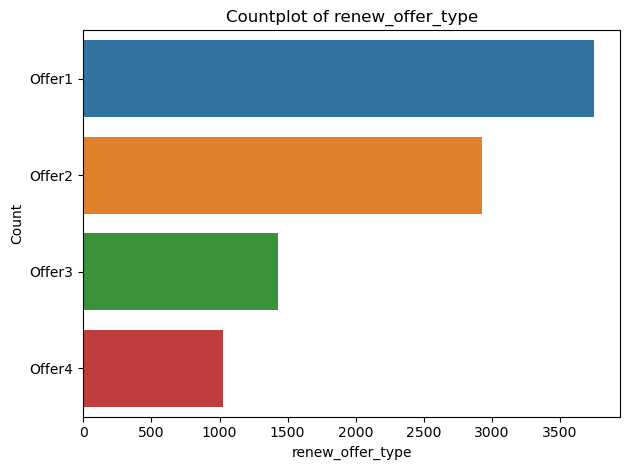

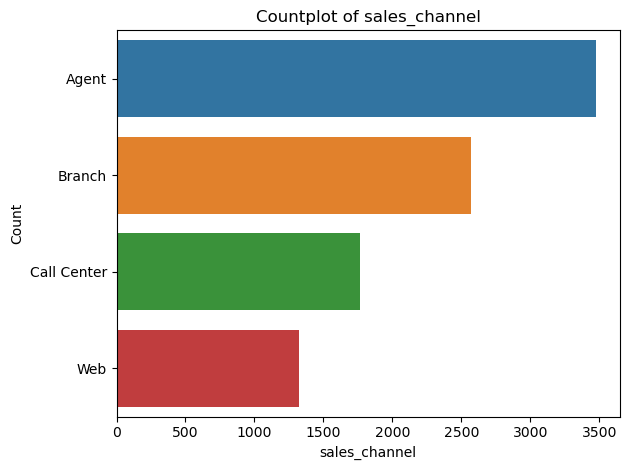

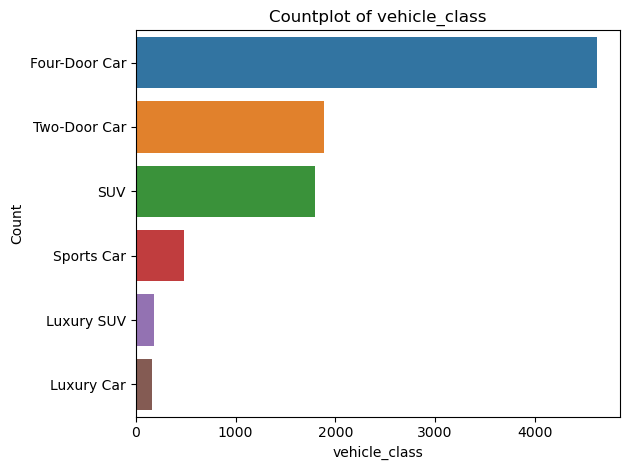

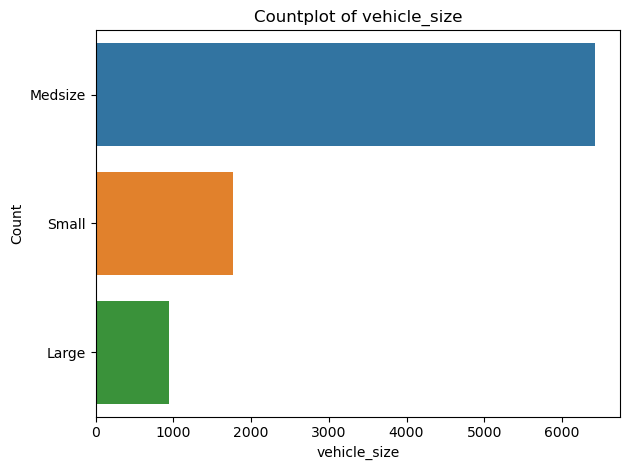

In [25]:
create_countplots_categorical(df_cat)

2.policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [26]:
#Drop the column policy_type
df_cat = df_cat.drop('policy_type',axis=1)

In [27]:
df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
df_cat['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [29]:
#transform the column policy to three possible values: L1, L2, and L3 using a function.

def trans_category_col(x):
    if 'L3' in x:
        return "L3"
    elif 'L2' in x:
        return "L2"
    else:
        return 'L1'
    
df_cat['policy'] = list(map(trans_category_col, df_cat['policy']))
df_cat['policy'].value_counts(dropna=False)

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

3.Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

In [30]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


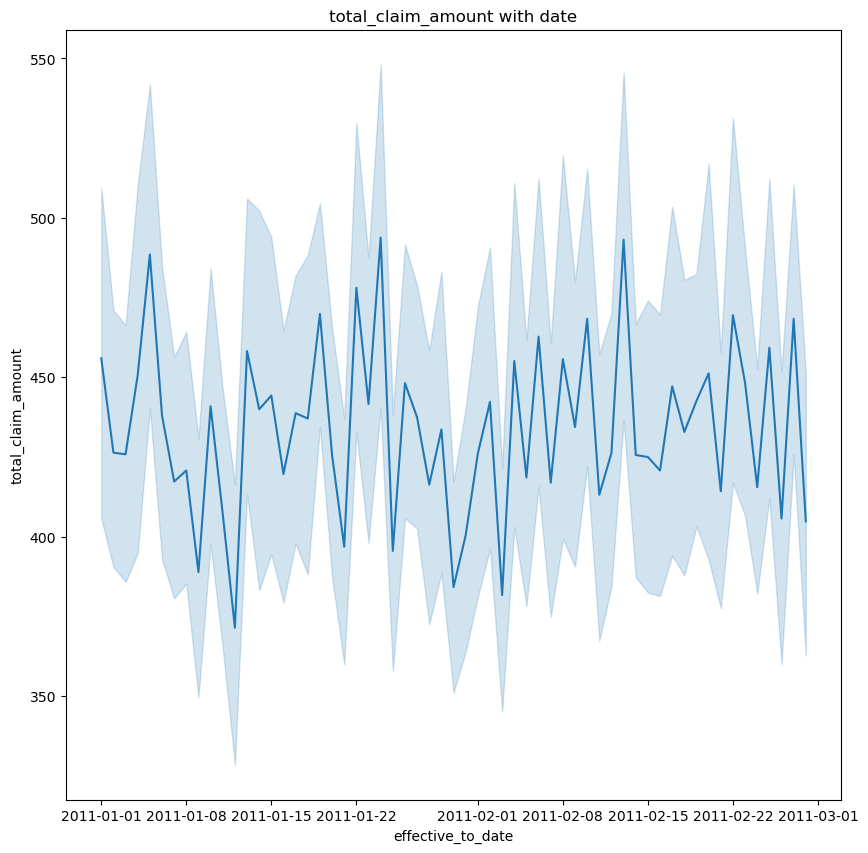

In [31]:
# Create a line plot to visualize total_claim_amount with date
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x='effective_to_date',  y= 'total_claim_amount')
plt.title('total_claim_amount with date')
plt.ylabel('total_claim_amount')
plt.xlabel('effective_to_date')

plt.show()

4.To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount

In [32]:
#define an empty pandas DataFrame
df_new = pd.DataFrame()

In [33]:
df_new.head()

""


In [34]:
#add the following new columns
df_new = pd.DataFrame(columns = ['day','day_name','week','month','total_claim_amount'])

# Create new columns for date, year, and day
df_new['day'] = df['effective_to_date'].dt.day
df_new['day_name'] = df['effective_to_date'].dt.day_name()
df_new['week'] = df['effective_to_date'].dt.isocalendar().week
df_new['month'] = df['effective_to_date'].dt.month
df_new['total_claim_amount'] = df['total_claim_amount']

In [35]:
df_new.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,2,384.811147
1,31,Monday,5,1,1131.464935
2,19,Saturday,7,2,566.472247
3,20,Thursday,3,1,529.881344
4,3,Thursday,5,2,138.130879


5.Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [36]:
df_new_agg = df_new.groupby("day_name")['total_claim_amount'].mean().round(2).reindex(index=['Monday','Tuesday','Wednesday',"Thursday",
                                                                                  'Friday','Saturday','Sunday'])

In [37]:
display(df_new_agg)

day_name
Monday       428.56
Tuesday      432.46
Wednesday    443.54
Thursday     433.80
Friday       428.64
Saturday     435.26
Sunday       437.34
Name: total_claim_amount, dtype: float64

In [38]:
df_new_agg = pd.DataFrame({'Total Claim Amount agg': df_new_agg})

6.Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

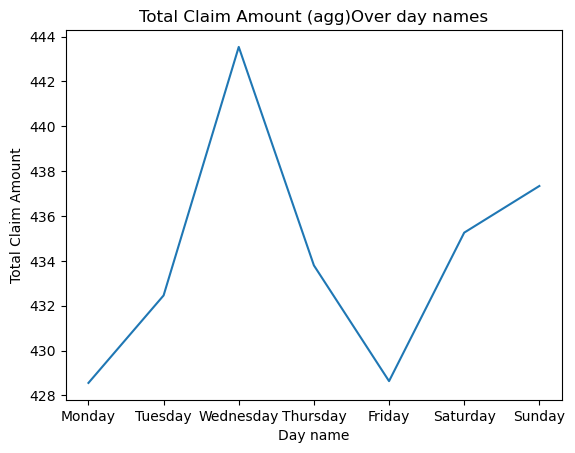

In [39]:
sns.lineplot(data=df_new_agg,  x='day_name', y ='Total Claim Amount agg' )
plt.title('Total Claim Amount (agg)Over day names')
plt.xlabel('Day name')
plt.ylabel('Total Claim Amount')
plt.show()

higher claim amounts during mid week(wednesday) and weekends

7.Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [40]:
df_new_count = df_new["day_name"].value_counts().reindex(index=['Monday','Tuesday','Wednesday',"Thursday",
                                                                'Friday','Saturday','Sunday'])

In [41]:
df_new_count = pd.DataFrame({'Total Claim Amount sum': df_new_count})

In [42]:
display(df_new_count)

,Total Claim Amount sum
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


8.Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [43]:
df_new_med=df_new.groupby("day_name")["total_claim_amount"].median().sort_values(ascending=False)
df_new_med = pd.DataFrame({'Total Claim Amount median': df_new_med})
display(df_new_med)
df_new_med.columns

,Total Claim Amount median
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


Index(['Total Claim Amount median'], dtype='object')

9.Plot the median "target" by day of the week name using a seaborn barplot

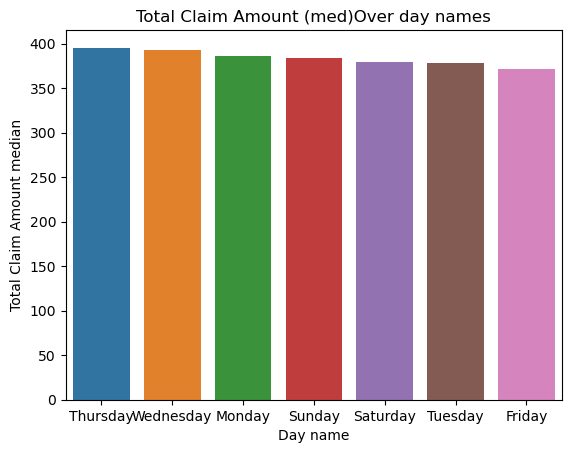

In [44]:
sns.barplot(data=df_new_med.reset_index(), x= 'day_name',  y ='Total Claim Amount median' )
plt.title('Total Claim Amount (med)Over day names')
plt.xlabel('Day name')
plt.ylabel('Total Claim Amount median')
plt.show()

10 .What can you conclude from this analysis?


Thursday and Wednesday have the highest median total claim amounts
Friday has the lowest median total claim amount: 

11.Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [45]:
df_new_month = df_new.groupby("month")['total_claim_amount'].mean().round(2).reindex(index=[1,2,3,4,5,6,7,8,9,10,11,12])

In [46]:
df_new_month

month
1     432.25
2     436.22
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
Name: total_claim_amount, dtype: float64


12.Can you do a monthly analysis given the output of the previous series? Why?

only jan and feb has values of total claim amount.

13.Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [47]:
def remove_outliers(col , thr = 3):
    ''' the function removes outliers for numerical continuous columns
    input : dataframe of numerical continuous columns'''
    val_mean = col.mean()
    val_std = col.std()
    upper_val = val_mean + val_std * thr
    lower_val = val_mean - val_std * thr
    return col[(col <= upper_val) & (col>= lower_val)]
    

In [48]:
continuous_df,discrete_df=separate_continuous_discrete(df_num)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


14.Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [49]:
continuous_clean_df = continuous_df.apply(lambda x: remove_outliers(x))

display(continuous_clean_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69.0,32,5,0.0,1,384.811147
1,6979.535903,0,94.0,13,42,0.0,8,1131.464935
2,12887.431650,48767,108.0,18,38,0.0,2,566.472247
3,7645.861827,0,106.0,18,65,0.0,7,529.881344
4,2813.692575,43836,73.0,12,44,0.0,1,138.130879


15.Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [50]:
#Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df

df_new = df_new.drop('total_claim_amount', axis=1)
df_with_nans = pd.concat([continuous_clean_df, discrete_df, df_cat,df_new] , axis=1)

In [51]:
display(df_with_nans.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim,number_of_open_complaints,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274,69.0,32,5,0.0,1,384.811147,32,0,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2
1,6979.535903,0,94.0,13,42,0.0,8,1131.464935,13,0,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1
2,12887.431650,48767,108.0,18,38,0.0,2,566.472247,18,0,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2
3,7645.861827,0,106.0,18,65,0.0,7,529.881344,18,0,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1
4,2813.692575,43836,73.0,12,44,0.0,1,138.130879,12,0,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2


In [52]:
df_with_nans.isnull().sum()

customer_lifetime_value          211
income                             0
monthly_premium_auto             200
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints        205
number_of_policies                 0
total_claim_amount               158
months_since_last_claim            0
number_of_open_complaints          0
number_of_policies                 0
state                              0
response                           0
coverage                           0
education                          0
employmentstatus                   0
gender                             0
location_code                      0
marital_status                     0
policy                             0
renew_offer_type                   0
sales_channel                      0
vehicle_class                      0
vehicle_size                       0
day                                0
day_name                           0
week                               0
m

In [53]:
df_with_nans.shape

(9134, 28)

In [54]:
#Use pd.dropna() and .reset_index() to fix the final dataframe.
df_with_nans = df_with_nans.dropna()
df_cleaned = df_with_nans.reset_index(drop = True)

In [55]:
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim,number_of_open_complaints,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274,69.0,32,5,0.0,1,384.811147,32,0,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2
1,6979.535903,0,94.0,13,42,0.0,8,1131.464935,13,0,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1
2,12887.431650,48767,108.0,18,38,0.0,2,566.472247,18,0,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2
3,7645.861827,0,106.0,18,65,0.0,7,529.881344,18,0,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1
4,2813.692575,43836,73.0,12,44,0.0,1,138.130879,12,0,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,89,0.0,2,198.234764,18,0,...,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,2
8466,3096.511217,21604,79.0,14,28,0.0,1,379.200000,14,0,...,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,2
8467,8163.890428,0,85.0,9,37,3.0,2,790.784983,9,3,...,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,2
8468,7524.442436,21941,96.0,34,3,0.0,3,691.200000,34,0,...,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,2


16.Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [56]:
#remove total claim amount and then add it
rem = list( df_cleaned.columns)
rem.remove("total_claim_amount")
rem.append('total_claim_amount')
df_cleaned = df_cleaned[rem]

In [57]:
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,18,89,0.0,0,2,2,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,2,198.234764
8466,3096.511217,21604,79.0,14,14,28,0.0,0,1,1,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,2,379.200000
8467,8163.890428,0,85.0,9,9,37,3.0,3,2,2,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,2,790.784983
8468,7524.442436,21941,96.0,34,34,3,0.0,0,3,3,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,2,691.200000


17.Turn the response column values into (Yes=1/No=0).

In [58]:
df_cleaned['response'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
def clean_response(x):
     
    if x =='Yes':
        return 1
    else:
        return 0
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[: , 'response'] = df_cleaned_copy['response'].apply(clean_response)
display(df_cleaned.head())

df_cleaned  = df_cleaned_copy.copy()


C:\Users\Megha\AppData\Local\Temp\ipykernel_9472\2390133150.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cleaned_copy.loc[: , 'response'] = df_cleaned_copy['response'].apply(clean_response)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


18.Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [60]:
df_cleaned['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [61]:
def clean_education(x):
     
    if x =='Bachelor':
        return 'Bachelor'
    elif x == 'College':
        return 'College'
    elif x == 'High School or Below':
        return 'High School or Below'
    else:
        return 'Graduate'
    
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[: , 'education'] = df_cleaned_copy['education'].apply(clean_education)
display(df_cleaned_copy.head())

df_cleaned  = df_cleaned_copy.copy()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [62]:
df_cleaned['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [63]:
def clean_employmentstatus(x):
     
    if x =='Employed':
        return 'Employed'
    elif x == 'Unemployed':
        return 'Unemployed'
    else:
        return 'Inactive'
    
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[: , 'employmentstatus'] = df_cleaned_copy['employmentstatus'].apply(clean_employmentstatus)
display(df_cleaned_copy.head())

df_cleaned  = df_cleaned_copy.copy()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


In [64]:
df_cleaned['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

20.Deal with column Gender turning the values into (1/0).

In [65]:
df_cleaned['gender'].unique()

array(['F', 'M'], dtype=object)

In [66]:
def clean_gender(x):
     
    if x =='F':
        return 1
    else:
        return 0
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[: , 'gender'] = df_cleaned_copy['gender'].apply(clean_gender)
display(df_cleaned.head())


C:\Users\Megha\AppData\Local\Temp\ipykernel_9472\559415546.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cleaned_copy.loc[: , 'gender'] = df_cleaned_copy['gender'].apply(clean_gender)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


21.Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [67]:
df_cleaned['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV',
       'Luxury Car'], dtype=object)

In [68]:
def clean_vehicle_class(x):
     
    if x in ['Sports Car', 'Luxury SUV','Luxury Car']:
        return 'Luxury'
    else :
        return x
df_cleaned_copy = df_cleaned.copy()
df_cleaned_copy.loc[: , 'vehicle_class'] = df_cleaned_copy['vehicle_class'].apply(clean_vehicle_class)
display(df_cleaned_copy.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879


22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [69]:
df_cleaned['coverage'].value_counts()

Basic       5272
Extended    2492
Premium      706
Name: coverage, dtype: int64

In [70]:
# Define a mapping dictionary based on the implicit ordering
coverage_mapping = {'Basic': 1, 'Extended': 2, 'Premium': 3}

# Use the map method to replace categorical values with numerical values
df_cleaned['coverage'] = df_cleaned['coverage'].map(coverage_mapping)
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,18,89,0.0,0,2,2,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,2,198.234764
8466,3096.511217,21604,79.0,14,14,28,0.0,0,1,1,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,2,379.200000
8467,8163.890428,0,85.0,9,9,37,3.0,3,2,2,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,2,790.784983
8468,7524.442436,21941,96.0,34,34,3,0.0,0,3,3,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,2,691.200000


23.Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [71]:
df_cleaned['employmentstatus'].value_counts()

Employed      5293
Unemployed    2120
Inactive      1057
Name: employmentstatus, dtype: int64

In [72]:
employmentstatus_mapping = {'Employed': 3, 'Inactive': 2, 'Unemployed': 1}

# Use the map method to replace categorical values with numerical values
df_cleaned['employmentstatus'] = df_cleaned['employmentstatus'].map(employmentstatus_mapping)

# Display the modified DataFrame
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,18,89,0.0,0,2,2,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,2,198.234764
8466,3096.511217,21604,79.0,14,14,28,0.0,0,1,1,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,2,379.200000
8467,8163.890428,0,85.0,9,9,37,3.0,3,2,2,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,2,790.784983
8468,7524.442436,21941,96.0,34,34,3,0.0,0,3,3,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,2,691.200000


24.Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [73]:
df_cleaned['location_code'].value_counts()

Suburban    5295
Rural       1684
Urban       1491
Name: location_code, dtype: int64

In [74]:
locationcode_mapping = {'Urban': 3, 'Suburban': 2, 'Rural': 1}

# Use the map method to replace categorical values with numerical values
df_cleaned['location_code'] = df_cleaned['location_code'].map(locationcode_mapping)

# Display the modified DataFrame
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,2,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,18,89,0.0,0,2,2,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,2,198.234764
8466,3096.511217,21604,79.0,14,14,28,0.0,0,1,1,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,2,379.200000
8467,8163.890428,0,85.0,9,9,37,3.0,3,2,2,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,2,790.784983
8468,7524.442436,21941,96.0,34,34,3,0.0,0,3,3,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,2,691.200000


25.Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [75]:
vehicle_size_mapping = {'Large': 3, 'Medsize': 2, 'Small': 1}

# Use the map method to replace categorical values with numerical values
df_cleaned['vehicle_size'] = df_cleaned['vehicle_size'].map(vehicle_size_mapping)

# Display the modified DataFrame
df_cleaned

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274,69.0,32,32,5,0.0,0,1,1,...,L3,Offer1,Agent,Two-Door Car,2,24,Thursday,8,2,384.811147
1,6979.535903,0,94.0,13,13,42,0.0,0,8,8,...,L3,Offer3,Agent,Four-Door Car,2,31,Monday,5,1,1131.464935
2,12887.431650,48767,108.0,18,18,38,0.0,0,2,2,...,L3,Offer1,Agent,Two-Door Car,2,19,Saturday,7,2,566.472247
3,7645.861827,0,106.0,18,18,65,0.0,0,7,7,...,L2,Offer1,Call Center,SUV,2,20,Thursday,3,1,529.881344
4,2813.692575,43836,73.0,12,12,44,0.0,0,1,1,...,L1,Offer1,Agent,Four-Door Car,2,3,Thursday,5,2,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,23405.987980,71941,73.0,18,18,89,0.0,0,2,2,...,L1,Offer2,Web,Four-Door Car,2,10,Thursday,6,2,198.234764
8466,3096.511217,21604,79.0,14,14,28,0.0,0,1,1,...,L3,Offer1,Branch,Four-Door Car,2,12,Saturday,6,2,379.200000
8467,8163.890428,0,85.0,9,9,37,3.0,3,2,2,...,L2,Offer1,Branch,Four-Door Car,2,6,Sunday,5,2,790.784983
8468,7524.442436,21941,96.0,34,34,3,0.0,0,3,3,...,L2,Offer3,Branch,Four-Door Car,3,3,Thursday,5,2,691.200000


26.Get a dataframe with the categorical nominal columns

In [76]:
df_cat.columns


Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

categorical nominal columns : state,education,martial_status,policy,vehicle_class,sales_channel,renew_offer_type

In [77]:
df_cat_nominal = df_cleaned[['state','education','marital_status','policy','vehicle_class','sales_channel','renew_offer_type']]

In [78]:
display(df_cat_nominal.head())

,state,education,marital_status,policy,vehicle_class,sales_channel,renew_offer_type
0,Washington,Bachelor,Married,L3,Two-Door Car,Agent,Offer1
1,Arizona,Bachelor,Single,L3,Four-Door Car,Agent,Offer3
2,Nevada,Bachelor,Married,L3,Two-Door Car,Agent,Offer1
3,California,Bachelor,Married,L2,SUV,Call Center,Offer1
4,Washington,Bachelor,Single,L1,Four-Door Car,Agent,Offer1


Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]


In [79]:
# check unique val for all the nominal col
for col in df_cat_nominal.columns:
    value_count = df_cat_nominal[col].value_counts()
    print (value_count)

California    2918
Oregon        2409
Arizona       1588
Nevada         812
Washington     743
Name: state, dtype: int64
Bachelor                2569
College                 2475
High School or Below    2422
Graduate                1004
Name: education, dtype: int64
Married     4961
Single      2253
Divorced    1256
Name: marital_status, dtype: int64
L3    4254
L2    2672
L1    1544
Name: policy, dtype: int64
Four-Door Car    4474
Two-Door Car     1832
SUV              1631
Sports Car        435
Luxury Car         50
Luxury SUV         48
Name: vehicle_class, dtype: int64
Agent          3201
Branch         2400
Call Center    1636
Web            1233
Name: sales_channel, dtype: int64
Offer1    3434
Offer2    2750
Offer3    1336
Offer4     950
Name: renew_offer_type, dtype: int64


In [80]:
levels = [ ['California','Oregon','Arizona','Nevada','Washington'], ['Bachelor','College','High School or Below','Graduate'],
          [ 'Married','Single','Divorced'],['L3','L2','L1'],['Four-Door Car','Two-Door Car','SUV','Sports Car','Luxury Car',
           'Luxury SUV'],['Agent','Branch','Call Center','Web'],['Offer1','Offer2','Offer3','Offer4']]

Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [81]:
from sklearn.preprocessing import OneHotEncoder
# Instantiate the OneHotEncoder with drop="first" and categories=levels
encoder = OneHotEncoder(drop='first', categories=levels)

## Lab | Comparing regression models

Define X and y

In [82]:
# Define X (features) and y (target)
X = df_cleaned.drop(columns=['total_claim_amount'])  # All columns except 'total_claim_amount'
y = df_cleaned['total_claim_amount']  # Target variable 'total_claim_amount'

Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=31)


Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [95]:
#categorical columns of test x
X_train_cat = X_train.select_dtypes(include = ["object"])
X_test_cat = X_test.select_dtypes(include = ["object"])
#numerical columns of test x
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)


Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [96]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform on X_train_cat
X_train_cat_encoded = encoder.fit_transform(X_train_cat)

# Transform X_test_cat using the same encoder
X_test_cat_encoded = encoder.transform(X_test_cat)
#we need to use .toarray()
X_train_cat_encoded_df = X_train_cat_encoded.toarray()
X_test_cat_encoded_df  =X_test_cat_encoded.toarray()
#  cast the resulting numpy arrays into pandas DataFrames
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_df, columns=encoder.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_df, columns=encoder.get_feature_names_out(),  index=X_test_cat.index)
display(X_train_cat_encoded_df.head())
display(X_test_cat_encoded_df.head())

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Graduate,education_High School or Below,gender_F,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
603,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6281,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
951,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Graduate,education_High School or Below,gender_F,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
8325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1884,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df

In [86]:
from sklearn.preprocessing import PowerTransformer
# Initialize the PowerTransformer
power_transformer =  PowerTransformer()

# Fit and transform on X_train_num
X_train_num_transformed = power_transformer.fit_transform(X_train_num)

# Transform X_test_num using the same Transformer
X_test_num_transformed = power_transformer.transform(X_test_num)

#  cast the resulting numpy arrays into pandas DataFrames
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns,  index=X_test_num.index)
display(X_train_num_transformed_df.head())
display(X_test_num_transformed_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,number_of_policies,number_of_policies,response,coverage,employmentstatus,location_code,vehicle_size,day,week,month
7741,0.307893,-1.655959,-1.540018,-1.453408,-1.453408,0.986368,-0.477249,-0.477249,-0.057760,-0.057760,...,-0.057760,-0.057760,-0.411336,-0.773988,-1.502780,0.032103,-1.694269,-0.435577,-0.976807,-0.922538
7389,0.954852,0.392275,1.430767,-1.104221,-1.104221,1.273909,-0.477249,-0.477249,0.515526,0.515526,...,0.515526,0.515526,-0.411336,1.189669,0.758586,1.665912,-1.694269,-0.557402,0.512278,1.083966
8160,1.282354,0.352500,1.047645,0.430081,0.430081,1.073764,-0.477249,-0.477249,-0.057760,-0.057760,...,-0.057760,-0.057760,-0.411336,-0.773988,0.758586,-1.634065,-1.694269,0.563060,0.707278,1.083966
1412,-0.273946,-1.655959,-0.656700,-0.562280,-0.562280,-0.534721,-0.477249,-0.477249,1.567933,1.567933,...,1.567933,1.567933,-0.411336,-0.773988,-1.502780,0.032103,0.146861,-0.942783,-1.872163,-0.922538
7570,-1.598287,-1.655959,-0.656700,0.908182,0.908182,-0.458152,-0.477249,-0.477249,-1.129706,-1.129706,...,-1.129706,-1.129706,-0.411336,-0.773988,-1.502780,0.032103,2.085082,-0.810562,-1.872163,-0.922538


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,number_of_policies,number_of_policies,response,coverage,employmentstatus,location_code,vehicle_size,day,week,month
3104,-0.369547,0.468495,1.235402,-0.685151,-0.685151,0.111301,2.075773,2.075773,-1.129706,-1.129706,...,-1.129706,-1.129706,-0.411336,1.595065,0.758586,0.032103,-1.694269,-0.199823,-0.976807,-0.922538
473,0.625836,1.001424,0.823681,0.071664,0.071664,1.073764,2.122466,2.122466,0.876846,0.876846,...,0.876846,0.876846,-0.411336,-0.773988,0.758586,-1.634065,0.146861,0.767487,0.871472,1.083966
5734,-0.964585,-0.015247,0.310042,0.165000,0.165000,0.309479,-0.477249,-0.477249,-1.129706,-1.129706,...,-1.129706,-1.129706,-0.411336,1.189669,-0.782987,0.032103,0.146861,-0.942783,0.512278,1.083966
4363,0.212341,0.374873,0.074928,1.336030,1.336030,0.868208,-0.477249,-0.477249,1.454462,1.454462,...,1.454462,1.454462,2.431102,1.189669,0.758586,0.032103,-1.694269,0.563060,-0.418166,-0.922538
4186,-1.116664,0.668125,-0.083319,1.127357,1.127357,-2.099323,-0.477249,-0.477249,-1.129706,-1.129706,...,-1.129706,-1.129706,-0.411336,1.189669,0.758586,0.032103,0.146861,-1.221762,-1.872163,-0.922538


Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [87]:
# Concatenate X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new
X_train_new = pd.concat([X_train_num_transformed_df,X_train_cat_encoded_df],axis=1)
# Concatenate X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new
X_test_new = pd.concat([X_test_num_transformed_df,X_test_cat_encoded_df],axis=1)

Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

In [88]:
from sklearn.preprocessing import MinMaxScaler
#Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new
scaler = MinMaxScaler() # Any scaler wanted.
scaler.fit(X_train_new)
numericals_train_standardized = scaler.transform(X_train_new)
numericals_test_standardized = scaler.transform(X_test_new)
#new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes
X_train_new_scaled_df = pd.DataFrame(numericals_train_standardized, columns = X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df  = pd.DataFrame(numericals_test_standardized,  columns = X_test_new.columns, index=X_test_new.index  )
display(X_train_new_scaled_df.head())
display(X_test_new_scaled_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
7741,0.557146,0.000000,0.000000,0.136024,0.136024,0.826726,0.0,0.0,0.384159,0.384159,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7389,0.701013,0.737096,0.804166,0.232791,0.232791,0.903765,0.0,0.0,0.589610,0.589610,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8160,0.773841,0.722783,0.700458,0.657977,0.657977,0.850142,0.0,0.0,0.384159,0.384159,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1412,0.427760,0.000000,0.239107,0.382974,0.382974,0.419192,0.0,0.0,0.966766,0.966766,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7570,0.133261,0.000000,0.239107,0.790468,0.790468,0.439707,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_open_complaints,number_of_policies,number_of_policies,...,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
3104,0.406501,0.764525,0.751283,0.348924,0.348924,0.592276,0.980446,0.980446,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
473,0.627848,0.956310,0.639833,0.558652,0.558652,0.850142,0.998377,0.998377,0.719098,0.719098,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5734,0.274180,0.590442,0.500796,0.584517,0.584517,0.645372,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4363,0.535898,0.730834,0.437152,0.909033,0.909033,0.795069,0.000000,0.000000,0.926101,0.926101,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4186,0.240361,0.836366,0.394316,0.851206,0.851206,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [89]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the scaled training data
linear_reg_model.fit(X_train_new_scaled_df, y_train)

# Get predictions for the training and test sets
train_predictions = linear_reg_model.predict(X_train_new_scaled_df)
test_predictions = linear_reg_model.predict(X_test_new_scaled_df)


Create a function that given a model prediction and real values returns a pandas dataframe with the following table:
Error_metric	Value 
MAE	value
MSE	value
RMSE	value
MAPE	value
R2	value

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
def model_prediction_error(y_true, y_pred):
    '''
    this function will returns a pandas dataframe with the MAE value,MSE value,RMSE value,MAPE value,R2 value
    '''
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
 # claculate mape
    mape = np.mean(np.abs(y_pred - y_true / y_true)) *100
    df = pd.DataFrame({ 'Error_metric' : ['MAE' , 'MSE', 'RMSE' , 'MAPE' , 'R2'] ,
                        'Value' : [mae , mse , rmse ,mape, r2 ]        
    })
    return df

Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [100]:
#predictions on the TRAIN  sets
train_error = model_prediction_error(y_train, train_predictions)
print("Predictions on train tests:" )
display(train_error)
#predictions on the Test  sets
test_error = model_prediction_error(y_test,test_predictions)
print("Predictions on test tests:" )
display(test_error)

Predictions on train tests:


,Error_metric,Value
0,MAE,225.959277
1,MSE,82042.880565
2,RMSE,286.431284
3,MAPE,40353.221454
4,R2,-0.540910


Predictions on test tests:


,Error_metric,Value
0,MAE,233.400034
1,MSE,88982.793633
2,RMSE,298.299838
3,MAPE,40361.707989
4,R2,-0.571049


Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [103]:
def train_model(model_list : list,X_train, y_train):
    '''
    this function will list of models, X_train and y_train to train several model and return the list of trained models.
    '''
    trained_models = []
    for model in model_list:
        data = model.fit(X_train,y_train)
        trained_models.append(data)    
    return trained_models
    


Use the function to train the following models (with default settings):
*LinearRegressor

*KNeighborsRegressor

*MLPRegressor

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# List of model classes to train with default settings
model_list = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

# Train multiple models
trained_models = train_model(model_list, X_train_new_scaled_df, y_train)



C:\Users\Megha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?

In [109]:
# Now you have a list of trained models: trained_models

for model in trained_models:
    predictions_train = model.predict(X_train_new_scaled_df)
    predictions_test = model.predict(X_test_new_scaled_df)
    train_error = model_prediction_error(y_train, predictions_train)
    print("Predictions on train tests:", model )
    display(train_error)
#predictions on the Test  sets
    test_error = model_prediction_error(y_test,predictions_test)
    print("Predictions on test tests:" , model )
    display(test_error)

Predictions on train tests: LinearRegression()


,Error_metric,Value
0,MAE,179.228421
1,MSE,53137.056889
2,RMSE,230.514765
3,MAPE,40183.164319
4,R2,0.001993


Predictions on test tests: LinearRegression()


,Error_metric,Value
0,MAE,184.137322
1,MSE,56993.478050
2,RMSE,238.733069
3,MAPE,40140.734455
4,R2,-0.006257


Predictions on train tests: KNeighborsRegressor()


,Error_metric,Value
0,MAE,162.221601
1,MSE,43025.651630
2,RMSE,207.426256
3,MAPE,40112.839586
4,R2,0.191903


Predictions on test tests: KNeighborsRegressor()


,Error_metric,Value
0,MAE,198.508120
1,MSE,67095.761600
2,RMSE,259.028496
3,MAPE,40034.017425
4,R2,-0.184619


Predictions on train tests: MLPRegressor()


,Error_metric,Value
0,MAE,176.817975
1,MSE,51648.696510
2,RMSE,227.263496
3,MAPE,40166.484254
4,R2,0.029947


Predictions on test tests: MLPRegressor()


,Error_metric,Value
0,MAE,183.648629
1,MSE,56794.301002
2,RMSE,238.315549
3,MAPE,40172.703514
4,R2,-0.002740


The Linear Regression model has poor performance with low R² values and a negative R² on the test set. It does not fit the data well.

The K-Nearest Neighbors (KNN) model performs better than Linear Regression in terms of R², but it still has a relatively low R² on the test set.

The MLP Regressor also has low R² values, but it performs slightly better than the other two models on the test set.